# Melbourne Home Price Prediction

In [36]:
import pandas as pd

In [37]:
melbourne_file_path = 'Datasets/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [38]:
# Drop missing values
melbourne_data = melbourne_data.dropna(axis=0)

In [39]:
# Prediction Target
y = melbourne_data.Price

In [40]:
# Chosen features
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [41]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Using scikit-learn

Build a model through the following steps:

- **Define:** Type of model
- **Fit:** Capture patterns from provided data
- **Predict**
- **Evaluate:** Determine how accurate the model's predictions are

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
# Define Model
melbourne_model = DecisionTreeRegressor(random_state=1)

In [44]:
# Fit Model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [45]:
# Make Predictions
melbourne_model.predict(X.head())

array([1035000., 1465000., 1600000., 1876000., 1636000.])

## Model Validation and MAE

**MAE** = (Mean Absolute Error)

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Split data into training and validation data, for both features and target
The split is based on a random number generator. Supplying a numeric value to
the random_state argument guarantees we get the same split every time we
run this script.

In [47]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [48]:
# Fit Model with train data
melbourne_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [49]:
val_predictions = melbourne_model.predict(val_X)

In [50]:
mean_absolute_error(val_y, val_predictions)

273518.01872175594

## Underfitting and Overfitting

Models can suffer from either:

- **Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- **Underfitting**: failing to capture relevant patterns, again leading to less accurate predictions.

In [53]:
# Utility function to compare MAE's
def get_mae(max_leaf_nodes, train_X, train_y, val_X, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [56]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, train_y, val_X, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


## Random Forests

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146


# Iowa Home Price Prediction

In [71]:
# Path of the file to read
iowa_file_path = 'Datasets/IowaHousing/train.csv'

home_data = pd.read_csv(iowa_file_path)

In [72]:
home_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [73]:
# Prediction Target
y = home_data.SalePrice

In [74]:
# Create the list of features below
feature_names = ['Lot Area', 'Year Built', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

In [75]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [24]:
# Choose Model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit the model
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [27]:
# Make Predictions
val_predictions = iowa_model.predict(val_X)

In [28]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

30575.253333333338


In [29]:
home_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2197.000000,2.197000e+03,2197.000000,1835.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2175.000000,...,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000
mean,1460.512517,7.127872e+08,57.064178,69.549319,10268.070096,6.116523,5.552572,1972.030951,1984.781065,105.101609,...,92.436959,48.768320,22.393719,2.361402,15.954028,2.789713,57.404188,6.189804,2007.793810,182376.851161
std,846.537251,1.887751e+08,42.360690,23.188224,7975.740885,1.429613,1.107019,30.450069,20.898245,184.897165,...,121.422842,69.127588,62.063281,22.843004,56.495484,39.991010,639.103790,2.746902,1.314345,81168.157405
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,733.000000,5.284410e+08,20.000000,58.500000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1452.000000,5.354532e+08,50.000000,69.000000,9488.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,2196.000000,9.071811e+08,70.000000,80.000000,11660.000000,7.000000,6.000000,2002.000000,2004.000000,166.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,2929.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,870.000000,742.000000,584.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [34]:
val_mae/home_data.describe()['SalePrice'].loc['mean']*100

16.76487621030182

## Choose the best no. of leaf nodes for the Decision tree

Run the decision tree with the full dataset

In [79]:
candidate_max_leaf_nodes = []
# Choosing the perfect number of leaf nodes
mae_list = np.array([])
for max_leaf_nodes in range(5, 500, 1):
    candidate_max_leaf_nodes.append(max_leaf_nodes)
    mae = get_mae(max_leaf_nodes, train_X, train_y, val_X, val_y)
    mae_list = np.append(mae_list, mae)

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_leaf_nodes[mae_list.argmin()]

24984.09310161919


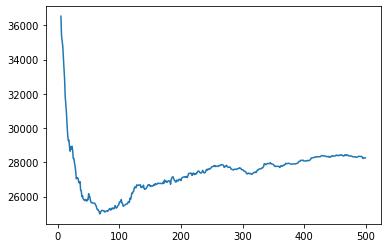

In [96]:
import matplotlib.pyplot as plt
plt.plot(candidate_max_leaf_nodes, mae_list)
print(mae_list[mae_list.argmin()])

In [92]:
# Fill in argument to make optimal size and uncomment
final_tree_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model and uncomment the next two lines
final_tree_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=68, random_state=0)

## Random Forest with full training data

In [97]:
# Using Random Forests
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [106]:
X_test = pd.read_csv('Datasets/IowaHousing/test.csv')
X_test = X_test[feature_names]

y_test = pd.read_csv('Datasets/IowaHousing/target.csv')

In [107]:
rf_full_predictions = rf_model.predict(X_test)

In [111]:
# Calculate the mean absolute error of your Random Forest model on the test data
rf_val_mae = mean_absolute_error(y_test.SalePrice, rf_full_predictions)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 19984.94470571039


## Choose the best Random Forest

In [113]:
# Function for comparing different models
def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

In [114]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [116]:
# Use the score function to score each model
for i in range(0, len(models)):
    mae = score_model(models[i], X, X_test, y, y_test.SalePrice)
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 20093
Model 2 MAE: 19964


/home/miguelpimentel/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Model 3 MAE: 19867
Model 4 MAE: 20327
Model 5 MAE: 20982
